# Iris Multi-class Classification with K-NN

In [1]:
# imports

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

- Goal: Classify flowers into species using petal/sepal measurements.

- Algorithm: K-Nearest Neighbors



- Steps:

Load the Iris dataset.

In [ ]:
iris = load_iris(return_X_y=False, as_frame=False)
X, y = iris.data, iris.target  

(150, 4) (150,)


In [3]:
print(X.shape, y.shape)  

(150, 4) (150,)


Train K-NN with different values of k (try 1, 3, 5, 7).

In [4]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

In [ ]:
# Feature scaling (important for distance-based algorithms), 
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
# For Logistic Regression, scaling isn’t strictly required,
# but it usually helps with optimization and interpretability.

In [6]:
k_values = [1, 3, 5, 7]
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)
    print(f"K={k}, Accuracy={acc:.4f}")


K=1, Accuracy=0.9333
K=3, Accuracy=0.9111
K=5, Accuracy=0.9111
K=7, Accuracy=0.9333


Plot accuracy vs. k to see how it changes.

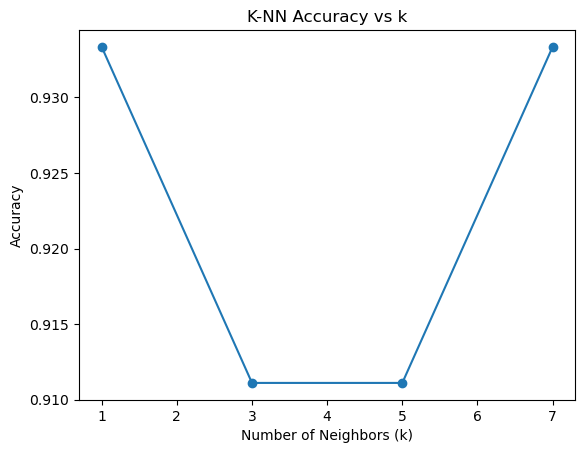

In [7]:
# Plot accuracy vs. k
plt.plot(k_values, accuracies, marker='o')
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Accuracy")
plt.title("K-NN Accuracy vs k")
plt.show()

Compare performance with logistic regression.

In [8]:
log_reg = LogisticRegression(max_iter=200)
log_reg.fit(X_train, y_train)
y_pred_lr = log_reg.predict(X_test)
acc_lr = accuracy_score(y_test, y_pred_lr)

print(f"Logistic Regression Accuracy = {acc_lr:.4f}")

Logistic Regression Accuracy = 0.9111


In [ ]:
from sklearn.model_selection import cross_val_score
import numpy as np

knn = KNeighborsClassifier(n_neighbors=3)
scores = cross_val_score(knn, X, y, cv=5)  # 5-fold cross-validation
print("Cross-validation accuracies:", scores)
print("Mean accuracy:", np.mean(scores))


Cross-validation accuracies: [0.96666667 0.96666667 0.93333333 0.96666667 1.        ]
Mean accuracy: 0.9666666666666668


### without scaling comparison

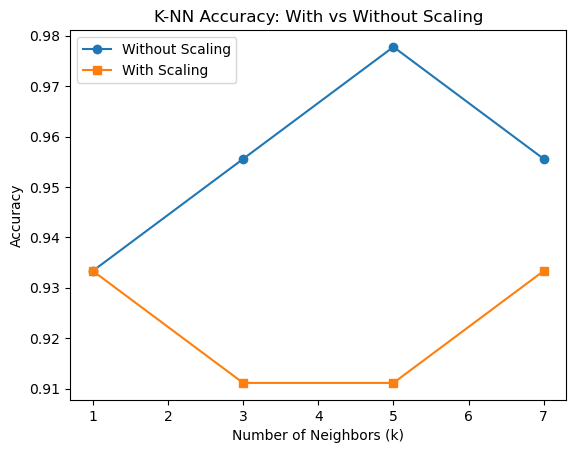

k=1: No Scaling=0.9333, With Scaling=0.9333
k=3: No Scaling=0.9556, With Scaling=0.9111
k=5: No Scaling=0.9778, With Scaling=0.9111
k=7: No Scaling=0.9556, With Scaling=0.9333


In [ ]:

iris = load_iris()
X, y = iris.data, iris.target
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)


k_values = [1, 3, 5, 7]
acc_no_scale = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    acc_no_scale.append(accuracy_score(y_test, y_pred))


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

acc_scaled = []
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)
    acc_scaled.append(accuracy_score(y_test, y_pred))


plt.plot(k_values, acc_no_scale, marker='o', label="Without Scaling")
plt.plot(k_values, acc_scaled, marker='s', label="With Scaling")
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Accuracy")
plt.title("K-NN Accuracy: With vs Without Scaling")
plt.legend()
plt.show()


for i, k in enumerate(k_values):
    print(f"k={k}: No Scaling={acc_no_scale[i]:.4f}, With Scaling={acc_scaled[i]:.4f}")


In K-Nearest Neighbors, feature scaling is generally recommended because the algorithm relies on distance metrics, and features with larger numeric ranges can dominate the calculation. However, in the Iris dataset, the petal measurements (length and width) are naturally more discriminative than sepal measurements. When we avoid scaling, these petal features dominate the distance metric, leading to higher accuracy (≈97–98%). After scaling, all features are weighted equally, which unintentionally gives more influence to the weaker sepal features, reducing accuracy (≈91–93%). Therefore, while scaling is the best practice for most real-world datasets, in the Iris dataset specifically, leaving the data unscaled provides better performance.